# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 9


### Zadanie 1

1. Wczytaj plik `mieszkania.csv`, np. za pomocą:
    - biblioteki [`pandas`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) (`read_csv`),
    - biblioteki [`numpy`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html) (`genfromtxt`),
    - biblioteki [`csv`](https://docs.python.org/3/library/csv.html) (`reader`).
1. Usuń nieprawidłowe dane np. wiersz zawierający wartość `-` lub wartość $0$ powinien zostać usunięty.
1. Zamień wartości liczbowe w formacie tekstowym na typ liczbowy.
1. Wyświetl **funkcję masy prawdopodobieństwa** wartości mieszkania dla różnych rodzajów "transakcji rynkowych". Podpowiedź: możesz skożystać z funkcji `displot` z modułu `seaborn` (jeżeli nie posiadasz to możesz zainstalować za pomocą `pip install seaborn`).
1. Wyświetl wszystkie trzy powyższe funkcje (dla ogółu, rynku pierwotnego i wtórnego) na jednym wykresie.
1. Opisz wyniki.

_Informacja odnośnie zbioru danych:_

- _Prezentowane dane dotyczące wielkości sprzedaży oraz cen nieruchomości zostały pobrane z GUSu i opracowane na podstawie informacji pozyskanych z Rejestru Cen Nieruchomości (RCN) – do 31 lipca Rejestru Cen i Wartości Nieruchomości (RCiWN) –  prowadzonego przez starostwa powiatowe i prezydentów miast na prawach powiatu przy wykorzystaniu informacji pochodzących z aktów notarialnych. Obserwacji podlegają tylko te transakcje kupna/sprzedaży nieruchomości, które zostały zawarte w trakcie badanego okresu oraz zostały zarejestrowane w RCN przed datą przekazania wyciągu z rejestru do Głównego Urzędu Statystycznego. Prezentowane są dane dla lokali mieszkalnych znajdujących się w budynkach wielorodzinnych (potocznie mieszkania w blokach), bez informacji o domach jednorodzinnych._
- _Prezentowane dane dotyczą sprzedaży o charakterze rynkowym tj. sprzedaży na wolnym rynku (z pewnymi wyłączeniami, np. sprzedaży między stronami spokrewnionymi) oraz sprzedaży przetargowej. W przypadku braku odpowiedniej informacji w zbiorach pochodzących z RCN (do 31 lipca 2021 r. – RCiWN), podział na rynek pierwotny i wtórny został przeprowadzony przyjmując założenie, że sprzedaż na rynku pierwotnym dotyczy transakcji dokonywanych na wolnym rynku, gdzie stroną sprzedającą jest osoba prawna i średnia cena za 1 m2 powierzchni użytkowej lokalu wynosi co najmniej 2 000 zł. Do transakcji na rynku wtórnym zaliczono pozostałe transakcje rynkowe przeprowadzone na wolnym rynku oraz sprzedaż przetargową. W grudniu 2021 r. zasilono BDL danymi ostatecznymi za lata 2010-2014, które dotyczą większej liczby transakcji kupna-sprzedaży lokali mieszkalnych w porównaniu do danych wcześniej opublikowanych przez GUS. Od roku 2020 brak danych dla miasta Koszalin oraz niekompletne dane dla miasta Szczecin._
- _Mediana cen za 1 m2 lokali mieszkalnych sprzedanych w ramach transakcji rynkowych_
- _Data ostatniej aktualizacji:	16.12.2021_
- Przypisy:	
  - `-` oznacza brak informacji z powodu: zmiany poziomu prezentacji, zmian wprowadzonych do wykazu jednostek terytorialnych lub modyfikacji listy cech w danym okresie sprawozdawczym; 
  - `n` - Dana jeszcze niedostępna, będzie dostępna; 
  - `x` - Brak informacji, konieczność zachowania tajemnicy statystycznej lub wypełnienie pozycji jest niemożliwe albo niecelowe; 
  - `X` - Zmiany metodologiczne, brak informacji, konieczność zachowania tajemnicy statystycznej lub wypełnienie pozycji jest niemożliwe albo niecelowe


### Punkt 1

In [20]:
from pandas import read_csv

data = read_csv('mieszkania.csv', delimiter=';')
data.head()

,Kod,Nazwa,Transakcje rynkowe,Powierzchnia użytkowa lokali mieszkalnych,Rok,Wartosc,Jednostka miary,Atrybut
0,0,POLSKA,ogółem,ogółem,2010,4045,zł,
1,0,POLSKA,ogółem,ogółem,2011,4095,zł,
2,0,POLSKA,ogółem,ogółem,2012,3976,zł,
3,0,POLSKA,ogółem,ogółem,2013,4023,zł,
4,0,POLSKA,ogółem,ogółem,2014,4029,zł,


### Punkt 2

In [21]:
data = data[~(data == '0').any(axis=1)]
data = data[~(data == '-').any(axis=1)]

data.drop(columns='Atrybut', inplace=True)
data = data.reset_index(drop=True)

data.head()

,Kod,Nazwa,Transakcje rynkowe,Powierzchnia użytkowa lokali mieszkalnych,Rok,Wartosc,Jednostka miary
0,0,POLSKA,ogółem,ogółem,2010,4045,zł
1,0,POLSKA,ogółem,ogółem,2011,4095,zł
2,0,POLSKA,ogółem,ogółem,2012,3976,zł
3,0,POLSKA,ogółem,ogółem,2013,4023,zł
4,0,POLSKA,ogółem,ogółem,2014,4029,zł


### Punkt 3

In [22]:
from pandas import to_numeric

data['Wartosc'] = to_numeric(data['Wartosc'])
data.head()

,Kod,Nazwa,Transakcje rynkowe,Powierzchnia użytkowa lokali mieszkalnych,Rok,Wartosc,Jednostka miary
0,0,POLSKA,ogółem,ogółem,2010,4045,zł
1,0,POLSKA,ogółem,ogółem,2011,4095,zł
2,0,POLSKA,ogółem,ogółem,2012,3976,zł
3,0,POLSKA,ogółem,ogółem,2013,4023,zł
4,0,POLSKA,ogółem,ogółem,2014,4029,zł


### Punkt 4 i 5

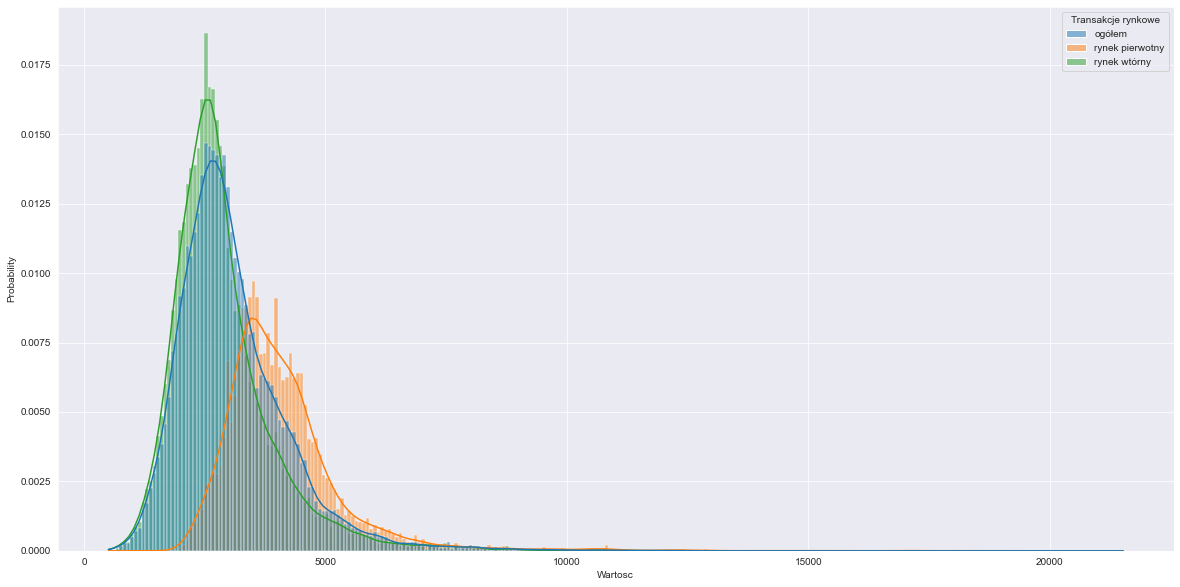

In [24]:
from seaborn import histplot
from matplotlib.pyplot import show, figure


figure(figsize=(20, 10))
histplot(data=data, x='Wartosc', hue='Transakcje rynkowe', kde=True, stat='probability')
show()

### Punkt 6

Mieszkania dostępne na rynku w większości pochodzą z rynku wtórnego, których cena jest zauważalnie niższa w porównaniu do runku pierwotnego.

### Zadanie 2 (kontynuacja poprzedniego)
1. Wyświetl dystrybuantę (funkcja `ecdfplot`) wartości mieszkań dla rodzaju transakcji `ogólny`.
1. Odczytaj "na oko" z wykresu ile % mieszkań sprzedaje się za cenę poniżej 4 tys. zł.

#### Punkt 1

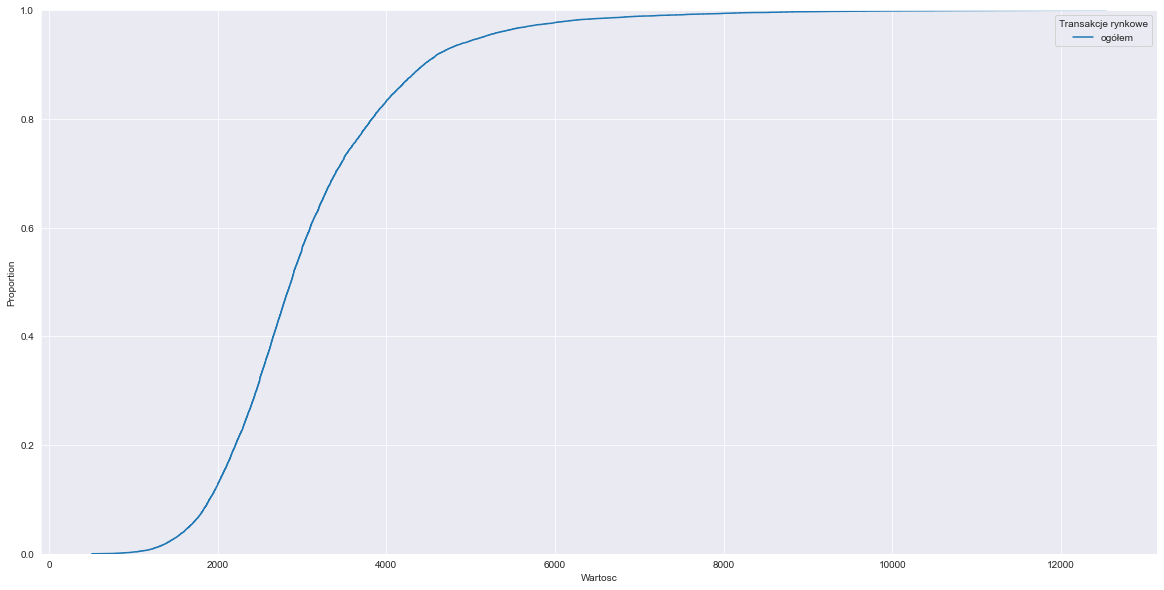

In [26]:
from seaborn import ecdfplot


figure(figsize=(20, 10))
ecdfplot(data=data[data['Transakcje rynkowe'] == 'ogółem'], x='Wartosc', hue='Transakcje rynkowe')
show()

### Punkt 2

Za cenę poniżej 4 tys. zł sprzedaje się ok. 80% mieszkań.

### Zadanie 3

Opis zbioru danych znajduje się w pliku z danymi.

1. Wczytaj plik `boston.txt` (zwróć uwagę na format pliku), bez ręcznej edycji tego pliku.
> Podpowiedź: możesz użyć funkcji `read_csv` z parametrami `skiprows`, `header`, `sep`.
1. Wyświetl funkcję masy prawdopodobieństwa dla ceny mieszkań.
1. Wyświetl funkcję masy prawdopodobieństwa dla dwóch zmiennych (`x` i `y`): `MEDV`, `RM`. W jakiej cenie i liczbie pokoi sprzedaje się najwięcej mieszkań? Co jeszcze można odczytać z wykresu?
1. Sprawdź jeszcze jeden dowolny atrybut i opisz wyniki.


### Punkt 1

In [41]:
from re import split
from numpy import array
from pandas import DataFrame


with open('boston.txt', 'rt') as f:
    data = f.readlines()

raw_data = []
raw_data_append = raw_data.append

for i in range(22, len(data), 2):
    pre = split(' +', data[i].strip())
    post = split(' +', data[i + 1].strip())
    raw_data_append(pre + post)

data = array(raw_data).astype(float)
data = DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATI', 'B', 'LSTAT', 'MEDV'])

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATI,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


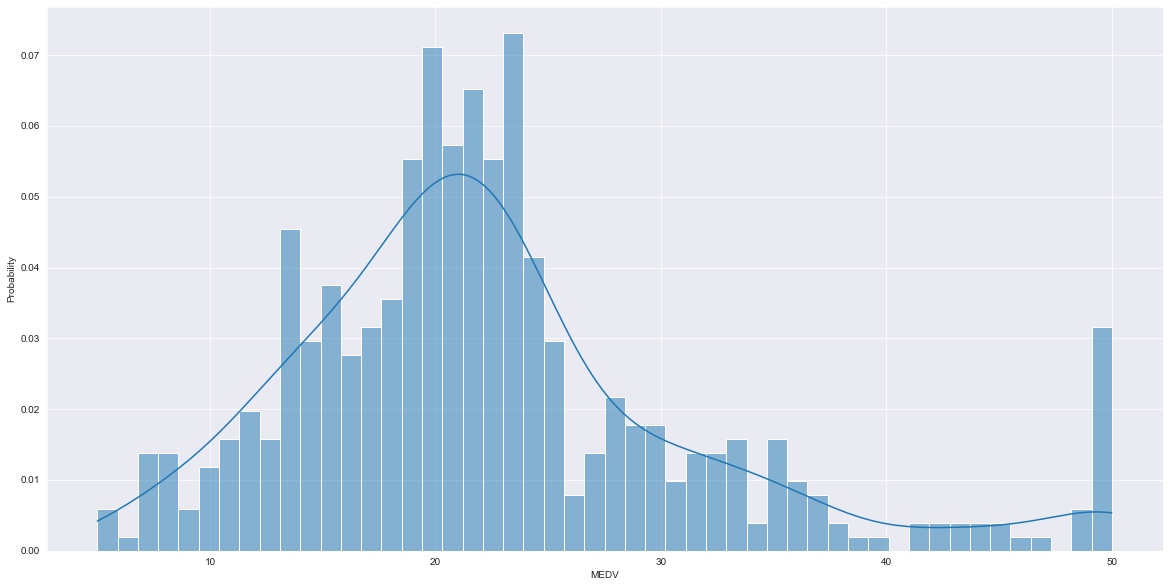

In [45]:
figure(figsize=(20, 10))
histplot(data=data, x='MEDV', kde=True, bins=50, stat='probability')
show()

### Punkt 2

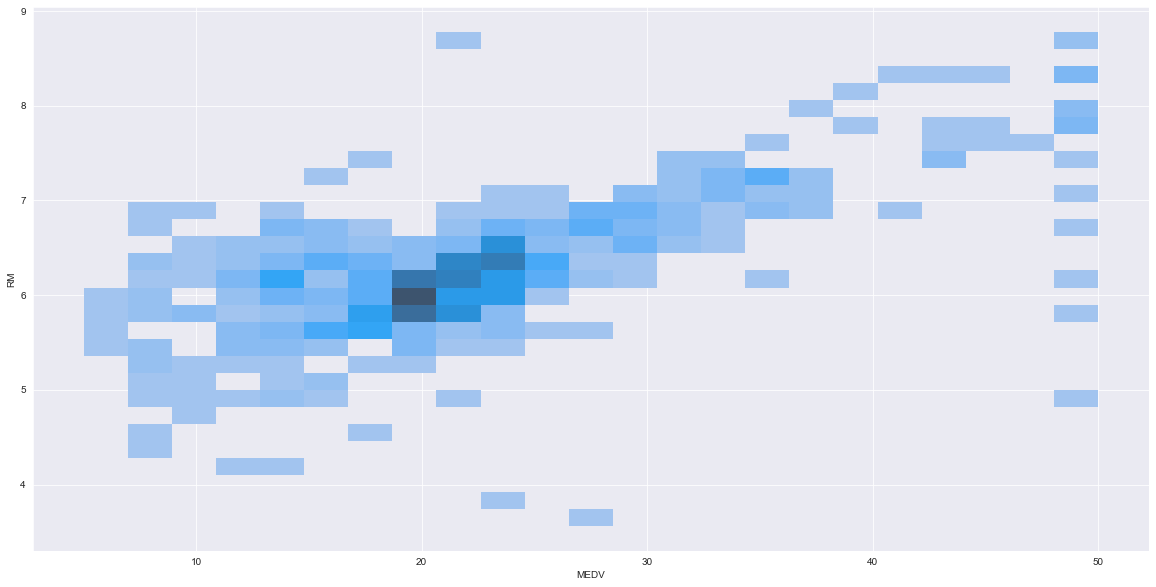

In [46]:
figure(figsize=(20, 10))
histplot(data=data, x='MEDV', y='RM', kde=True, stat='count')
show()

**W jakiej cenie i liczbie pokoi sprzedaje się najwięcej mieszkań?**
Najwięcej mieszkań sprzedaje się w cenie ok. 20 tys. z 6 pokojami.

**Co jeszcze można odczytać z wykresu?**
Prawie całkowity brak sprzedaży mieszkań z mniejszą liczbą pokoi niż 4. Najwięcej mieszkań sprzedaje się między 5-7 pokojami w cenie między 15-30 tys.

### Punkt 3

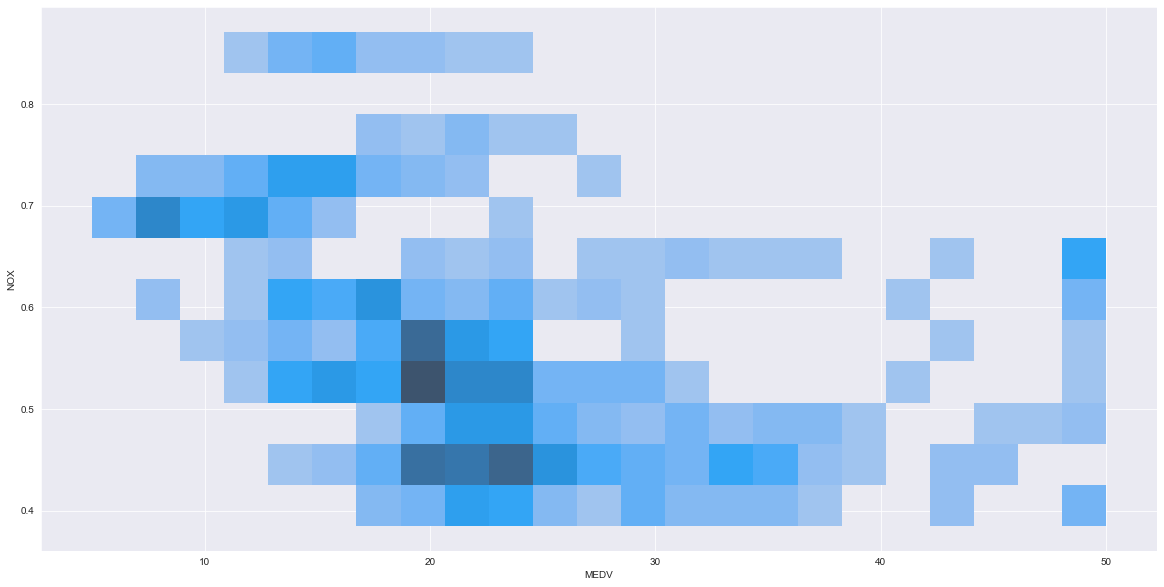

In [50]:
figure(figsize=(20, 10))
histplot(data=data, x='MEDV', y='NOX', kde=True, stat='count')
show()

Najwięcej mieszkań sprzedaje się z stężeniem tlenków azotu poniżej 0.7. Nie ma zauważalnej różnicy sprzedaży dla mieszkań między stężeniami w przedziale 0.0-0.6. Oznacza to, że ludzie kupujący mieszkania nie zwracają uwagi na poziom stężenia tlenków azotu podczas podejmowania decyzji o zakupie mieszkania.